## imports

In [142]:
from bigraph_viz import plot_bigraph, plot_multitimestep, plot_flow
from bigraph_viz.dict_utils import replace_regex_recursive

save_images = False
plot_settings = {
    'remove_process_place_edges': True, 
    'size':'8,5', 
    'show_types': True, 
}
save_images_settings = {
    'out_dir': 'out/NIH_NIA',
    'dpi': '250'
}
if save_images:
    plot_settings.update(save_images_settings)

## Summary figure

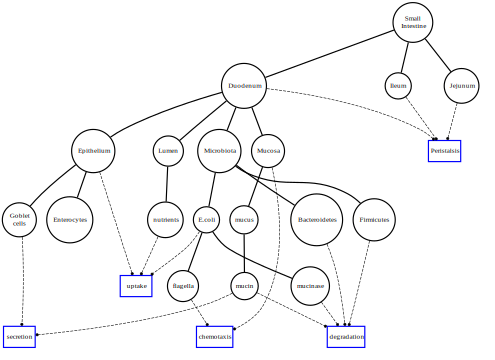

In [163]:
summary_schema = {
    'Small Intestine': {
        'Duodenum': {
            'Lumen': {
                'nutrients': {}},
            'Mucosa': {
                'mucus': {'mucin': 'Any'}},
            'Epithelium': {
                'Goblet cells': {
                    'secretion': {
                        '_ports': {'secreted': '', 'mucins': ''},
                        'wires': {
                            'secreted': ['..', '..', 'Mucosa', 'mucus', 'mucin'],
                            'mucins': ['..', 'Goblet cells',] }}
                },
                'Enterocytes': {}
            },
            'Microbiota': {
                'E.coli': {
                    'mucinase': {},
                    'flagella': {},
                    'chemotaxis': {
                        '_ports': {
                            'mucus': 'Any',
                            'flagella': 'Any'},
                        'wires': {
                            'mucus': ['..', '..', 'Mucosa'],
                            'flagella': ['flagella']}}},
                'Bacteroidetes': {},
                'Firmicutes': {},
            }, 
            'uptake': {
                '_ports': {
                    '1': '', '2': '', '3': '',},
                'wires': {
                    '1': ['Lumen', 'nutrients'],
                    '2': ['Microbiota', 'E.coli'],
                    '3': ['Epithelium']}},
            'degradation': {
                '_ports': {
                    '1': '', '2': '', '3': '', '4': ''},
                'wires': {
                    '1': ['Mucosa', 'mucus', 'mucin'],
                    '2': ['Microbiota', 'E.coli', 'mucinase'],
                    '3': ['Microbiota', 'Bacteroidetes'],
                    '4': ['Microbiota', 'Firmicutes'],
                }
            }
        },
        'Jejunum': {},
        'Ileum': {},
        'Peristalsis': {
            '_ports': {
                '1': '', '2': '', '3': ''},
            'wires': {
                '1': ['Duodenum'],
                '2': ['Jejunum'],
                '3': ['Ileum']}}}}

summary_schema = replace_regex_recursive(summary_schema)

# plot
plot_settings2 = {
    'node_groups':[
        [
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota'), 
            ('Small<br/>Intestine', 'Duodenum', 'Mucosa')
        ],
        [
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Goblet<br/>cells'), 
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Enterocytes'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'Bacteroidetes'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'Firmicutes'), 
        ],
    ], 
    'node_border_colors': {
        ('Small<br/>Intestine', 'Peristalsis'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Goblet<br/>cells', 'secretion'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli', 'chemotaxis'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'uptake'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'degradation'): 'blue',
    },
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(summary_schema, **plot_settings2, filename='gut_microbiome')

## Vivarium basics

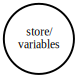

In [144]:
# simple spec
simple_object_spec = {'store/<br/>variables': {}}

# plot
plot_bigraph(simple_object_spec, **plot_settings, filename='store')

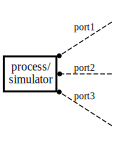

In [145]:
# process spec
process_spec = {
    'process/<br/>simulator': {
        '_ports': {
            'port1': 'type',
            'port2': 'type',
            'port3': 'type'}}}

# plot
plot_settings1 = {'rankdir':'RL', **plot_settings}
plot_bigraph(process_spec, **plot_settings1, filename='process')

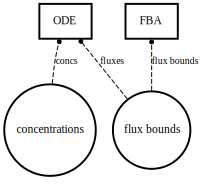

In [146]:
# composite spec
flat_composite_spec = {
    'concentrations': {},
    'flux bounds': {},
    'ODE': {
        '_ports': {'concs': 'type', 'fluxes': 'type',},
        'wires': {
            'concs': 'concentrations',
            'fluxes': 'flux bounds'}},
    'FBA': {
        '_ports': {'flux bounds': 'type'},
        'wires': {
            'flux bounds': 'flux bounds'}}}

# plot
plot_settings1 = {'rankdir':'BT', **plot_settings}
plot_bigraph(flat_composite_spec, **plot_settings1, filename='composite')

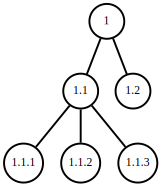

In [147]:
# hierarchy spec
hierarchy = {
    '1': {
        '1.1': {'1.1.1': '',
              '1.1.2': '',
              '1.1.3': ''},
        '1.2': {}}}

# plot
plot_bigraph(hierarchy, **plot_settings, filename='hierarchy')

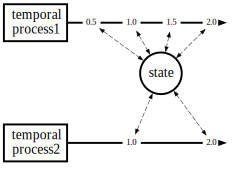

In [148]:
plot_settings3={}
if save_images:
    plot_settings3.update(save_images_settings)

multitimestep_spec = {
    'temporal process2': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal process1': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings3, filename='multitimestep')

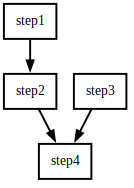

In [149]:
flow = {
    'step1': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step2': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': 'step1', 
    },
    'step3': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step4': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': ['step2', 'step3'], 
    },
}

plot_flow(flow, **plot_settings3, filename='flow')

## Modeling subaim 1

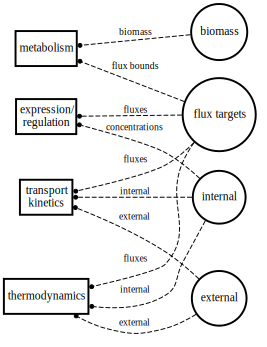

In [150]:
internal_concs = 'internal'
external_concs = 'external'

# aim 1 schema
aim1 = {
    'biomass': {},
    'flux targets': {},
    internal_concs: {},
    external_concs: {},
    'expression/<br/>regulation': {
        '_ports': {'fluxes': '', 'concentrations': ''},
        'wires': {
            'fluxes': 'flux targets',
            'concentrations': internal_concs
        }
    },
    'transport<br/>kinetics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'thermodynamics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'metabolism': {
        '_ports': {'flux bounds': '', 'biomass': ''},
        'wires': {
            'flux bounds': 'flux targets',
            'biomass': 'biomass'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(aim1, **plot_settings2, filename='aim2')

## Modeling subaim 2

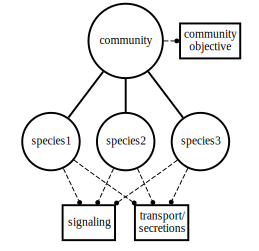

In [151]:
# generic schema
obj_schema = {'_ports': {'1': ''}, 'wires': {'1': []}}
molecular_mechanism_schema = {
            '_ports': {'1': '', '2': '', '3': ''},
            'wires': {
                '1': 'species1',
                '2': 'species2',
                '3': 'species3'}}

# aim 3 schema
aim3 = {
    'community': {
        'species1': {},
        'species2': {},
        'species3': {},
        'community<br/>objective': {
            '_ports': {'1': ''},
            'wires': {'1': []}
        },
        'signaling': molecular_mechanism_schema,
        'transport/<br/>secretions': molecular_mechanism_schema
    },
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[
        # ('environment',), 
        ('community',), 
        ('community', 'community<br/>objective')]], 
    'invisible_edges': [
        (('community',), ('community', 'community<br/>objective')),
        (('community',), ('community', 'signaling')),
        (('community',), ('community', 'transport/<br/>secretions')),
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim3, **plot_settings2, filename='aim3')

## Modeling subaim 3

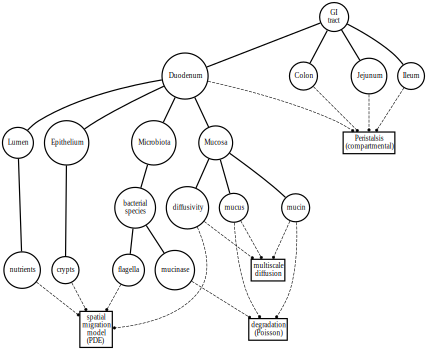

In [152]:
bacteria_id = 'bacterial species'

aim4 = {
    'GI tract': {
        'Duodenum': {
            'Lumen': {
                'nutrients': {}
            },
            'Mucosa': {
                'mucus': 'Any',
                'mucin': 'Any',
                'diffusivity': {},
                'multiscale diffusion': {
                    '_ports': {
                        '1': '', 
                        '2': '', 
                        '3': '', 
                    },
                    'wires': {
                        '1': ['diffusivity'],
                        '2': ['mucus'],
                        '3': ['mucin'],
                    }
                }
            },
            'Epithelium': {
                'crypts': {}
            },
            'Microbiota': {
                bacteria_id: {
                    'mucinase': {},
                    'flagella': {},
                },
            }, 
            'degradation (Poisson)': {
                '_ports': {
                    '1': '', 
                    '2': '',
                    '3': '',                
                },
                'wires': {
                    '1': ['Mucosa', 'mucin'],
                    '2': ['Mucosa', 'mucus'],
                    '3': ['Microbiota', bacteria_id, 'mucinase'],
                }
            },
            'spatial migration model (PDE)': {
                '_ports': {
                    'flagella': '', 
                    'signal': '',
                    'shape': '',
                    'diffusivity': '',
                },
                'wires': {
                    'flagella': ['Microbiota', bacteria_id, 'flagella'],
                    'signal': ['Lumen', 'nutrients'],
                    'shape': ['Epithelium', 'crypts'],
                    'diffusivity': ['Mucosa', 'diffusivity'],
                }
            }
        },
        'Jejunum': {},
        'Ileum': {},
        'Colon': {},
        'Peristalsis (compartmental)': {
            '_ports': {
                '1': '', '2': '', '3': '', '4': ''
            },
            'wires': {
                '1': ['Duodenum'],
                '2': ['Jejunum'],
                '3': ['Ileum'],
                '4': ['Colon']
            }
        }
    }
}

aim4 = replace_regex_recursive(aim4)

# plot
plot_settings2 = {
    'node_groups':[
        [
            ('GI<br/>tract', 'Duodenum', 'Epithelium'), 
            ('GI<br/>tract', 'Duodenum', 'Microbiota'), 
            ('GI<br/>tract', 'Duodenum', 'Mucosa')
        ]
    ], 
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim4, **plot_settings2, filename='aim4')

## Modeling subaim 4

node ('environment',) not in graph


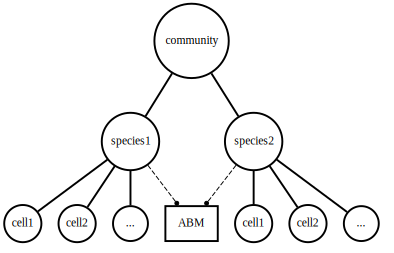

In [153]:
# aim 5 schema
aim5 = {
    'community': {
        'species1': {'cell1': {}, 'cell2': {}, '...': {}},
        'species2': {'cell1': {}, 'cell2': {}, '...': {}},
        'ABM': {
            '_ports': {
                '1': '', 
                '2': '', 
                # 'env': '',
            },
            'wires': {
                '1': 'species1',
                '2': 'species2',
                # 'env': ['..', '..', 'environment'],
            }}},
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',)]], 
    'invisible_edges': [(('community',), ('community', 'ABM'))],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim5, **plot_settings2, filename='aim5')